In [1]:
import world
import agents

Parsing domain blocks-domain.pddl
Parsing problem blocks_problem_default.pddl


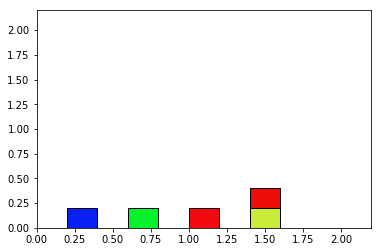

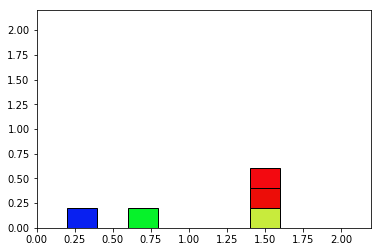

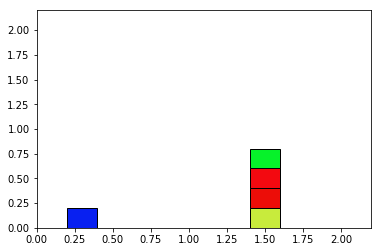

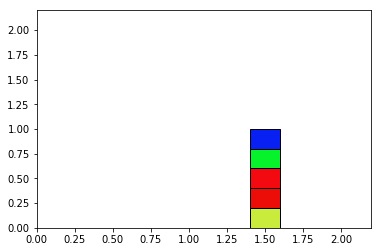

In [2]:
w = world.PDDLWorld('blocks-domain.pddl', 'blocks_problem_default.pddl')
agent = agents.CorrectingAgent(w)
plan = agent.plan()
for a, args in plan:
    w.update(a, args)
    w.draw()

In [3]:
print(agent.problem.asPDDL())
print(agent.domain.asPDDL())

(define (problem blocks-1)
	(:domain blocksworld)
	(:objects b1 b2 b3 b4 b5)
	(:init 
		(on-table b1)
		(on-table b2)
		(on-table b3)
		(on-table b4)
		(on-table b5)
		(clear b1)
		(clear b2)
		(clear b3)
		(clear b4)
		(clear b5)
		(arm-empty )
		(in-tower b4)
	)
	(:goal (forall (?x) (in-tower ?x)))
)
(define (domain blocksworld)
	(:requirements :strips :disjunctive-preconditions :negative-preconditions :quantified-preconditions :conditional-effects)
	(:types )
	(:constants )
	(:predicates
		(clear ?x)
		(on-table ?x)
		(arm-empty )
		(holding ?x)
		(on ?x ?y)
		(blue ?x)
		(red ?x)
		(in-tower ?x)
		(green ?x)
		(yellow ?x)
	)
(:action put
	:parameters (?ob ?underob)
	:precondition (and (clear ?ob) (on-table ?ob) (arm-empty ) (clear ?underob))
	:effect (and (on ?ob ?underob) (not (clear ?underob)) (not (on-table ?ob)) (when (in-tower ?ob) (in-tower ?underob)))
)
)


In [5]:
problem.asPDDL()

NameError: name 'problem' is not defined

In [1]:
import ff

In [3]:
ff.run('blocks-domain.pddl', 'blocks_problem_default.pddl')

[('put', ['b5', 'b4']),
 ('put', ['b3', 'b5']),
 ('put', ['b2', 'b3']),
 ('put', ['b1', 'b2'])]

In [4]:
a1, args1 = plan[0]

In [7]:
a1

'put'

In [5]:
w.update(a1, args1)

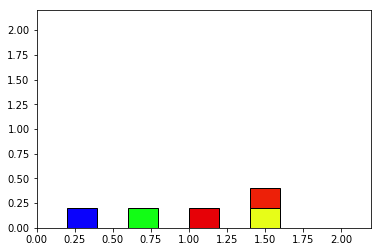

In [7]:
w.draw()

In [4]:
# No put red blocks on blue blocks

In [5]:
import scipy

In [7]:
from scipy.stats import norm

In [9]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A normal continuous random variable.
 |  
 |  The location (loc) keyword specifies the mean.
 |  The scale (scale) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  The survival function, ``norm.sf``, is also referred to as the
 |  Q-function in some contexts (see, e.g.,
 |  `Wikipedia's <https://en.wikipedia.org/wiki/Q-function>`_ definition).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), l

In [10]:
norm.pdf(0.1)

0.3969525474770118

In [14]:
norm.ppf(0.999)

3.090232306167813

In [21]:
norm.pdf((0.1, 0.1), loc=(0.1, 0.5), scale=(0.1, 0.3))

array([3.9894228 , 0.54670025])

In [210]:
from collections import namedtuple
import numpy as np
from scipy.stats import norm
import copy

ColourModel = namedtuple('ColourModel', ['name', 'mu', 'sigma'])
rule_belief = (0.5, 0.5)



class ColourModel(object):
    
    def __init__(self, name, mu0=np.array([0.5, 0.5, 0.5]), 
                 alpha0=np.array([1., 1., 1.]),
                 beta0=np.array([1., 1., 1.]),
                 gamma=np.array(10),
                 p_c=np.array([0.5, 0.5]), 
                 mu1=np.array([0.5, 0.5, 0.5]), 
                 alpha1=np.array([1., 1., 1.]),
                 beta1=np.array([1., 1., 1.])):
        
        self.name = name
        self.mu0 = mu0
        self.alpha0 = alpha0
        self.beta0 = beta0
        self.mu1 = mu0
        self.alpha1 = alpha0
        self.beta1 = beta0
        self.sigma0 = beta0/(alpha0 + 3/2)
        self.sigma1 = beta1/(alpha1 + 3/2)
        self.p_c = p_c

        
        
    def p(self, c, fx):
        p1 = self.p_c[1] * np.sum(norm.pdf(fx, loc=self.mu0, scale=self.sigma0))
        p0 = self.p_c[0] * np.sum(norm.pdf(fx, loc=self.mu1, scale=self.sigma1))
        return [p0, p1][c]/(p1 + p0)
    
    def update(self, fx, w):
        asquigle = 1/gamma + 1
        bsquigle = mu0/gamma + x
        csquigle = mu0**2/gamma + fx**2
        mu_post = bsquigle/asquigle
        alpha = alpha0 + 1/2
        beta = beta0 +  0.5*(csquigle - bsquigle**2/asquigle)
        return mu_post, alpha, beta
        #updated_mu = (w*fx*self.sigma_prior + self.mu * self.sigma)/(w*self.sigma_prior + self.sigma)
        #return updated_mu

class ColourModel(object):
    
    def __init__(self, name, mu=np.array([0.5, 0.5, 0.5]), 
                 sigma=np.array([0.1, 0.1, 0.1]), 
                 p_c=np.array([0.5, 0.5]), 
                 mu_nill = np.array([0.5, 0.5, 0.5]),
                 sigma_nill = np.array([10., 10., 10.])):
        self.name = name
        self.mu = mu
        self.sigma = sigma
        self.mu_nill = mu_nill
        self.sigma_nill = sigma_nill
        self.p_c = p_c
        self.sigma_prior = 1
        
        
    def p(self, c, fx):
        p1 = self.p_c[1] * np.sum(norm.pdf(fx, loc=self.mu, scale=self.sigma))
        p0 = self.p_c[0] * np.sum(norm.pdf(fx, loc=self.mu_nill, scale=self.sigma_nill))
        return [p0, p1][c]/(p1 + p0)
    
    def update_mu(self, fx, w):
        updated_mu = (w*fx*self.sigma_prior + self.mu * self.sigma)/(w*self.sigma_prior + self.sigma)
        return updated_mu
    
    
    
    
class CorrectionModel(object):
    def __init__(self, rules, c1, c2, rule_belief=(0.5, 0.5)):
        self.rules = rules
        self.c1 = c1
        self.c2 = c2
        self.rule_belief = rule_belief
        self.variables = [c1.name, c2.name, 'r']
        
    # data and hidden seem to be some kind of dictionary while hidden seems to be a list of keys
    def p(self, data, visible):
        hidden = set(self.variables) - visible.keys()
        if not hidden:
            #print('reached here with hidden={}'.format(hidden))
            return (self.rule_belief[visible['r']] * 
                    self.c1.p(visible[self.c1.name], data[self.c1.name]) * 
                    self.c2.p(visible[self.c2.name], data[self.c2.name]) * 
                    self.evaluate_correction(visible))
        else:
            h = hidden.pop()
            #print('adding {} to visible'.format(h))
            visible[h] = 0
            v0 = self.p(data, copy.copy(visible))
            #print('finished recursion for {}=0 with value {}'.format(h, v0))
            visible[h] = 1
            v1 = self.p(data, copy.copy(visible))
            #print('finished recursion for {}=1 with value {}'.format(h, v1))
            return v0 + v1
        
    def p_r(self, r, data, visible={}):
        v0 = copy.copy(visible)
        v0.update({'r':0})
        r0 = self.p(data, visible=v0)
        v1 = copy.copy(visible)
        v1.update({'r':1})
        r1 = self.p(data, visible=v1)
        eta = r0 + r1
        return [r0, r1][r]/eta
    
    def update_belief_r(self, data,visible={}):
        r0 = self.p_r(0, data, visible=visible.copy())
        r1 = self.p_r(1, data, visible=visible.copy())
        print(r0, r1)
        self.rule_belief = (r0, r1)
        return self.rule_belief
    
    def update_c(self, data):
        self.c1.update_mu(data[self.c1.name], self.rule_belief[0])
        self.c2.update_mu(data[self.c1.name], self.rule_belief[1])
        
    def update_model(self, data):
        self.update_belief_r(data)
        self.update_c(data)
            
    def evaluate_correction(self, visible):
        # r=0: \forall x. y. c1(x) & on(x,y) -> c2(y). => on(x,y) c1(x) -c2(y)
        # r=1 \forall x.y. c2(y) & on(x,y) -> c1(x). => on(x, y) -c1(x) c2(y)
        rule0 = visible['r'] == 0 and visible[self.c1.name] == 1 and visible[self.c2.name] == 0
        rule1 = visible['r'] == 1 and visible[self.c1.name] == 0 and visible[self.c2.name] == 1
        return float(rule0 or rule1)
    
    
class TableCorrectionModel(CorrectionModel):
    def __init__(self, rules, c1, c2, rule_belief=(0.5, 0.5)):
        self.rules = rules
        self.c1 = c1
        self.c2 = c2
        self.c3 = ColourModel('{}/{}'.format(c1.name, c2.name), 
                              mu = c1.mu, sigma=c1.sigma,
                              mu_nill=c2.mu, sigma_nill=c2.sigma)
        self.rule_belief = rule_belief
        self.variables = ['r', c1.name, c2.name, self.c3.name]
        
    # data and hidden seem to be some kind of dictionary while hidden seems to be a list of keys
    def p(self, data, visible):
        hidden = set(self.variables) - visible.keys()
        if not hidden:
            #print('reached here with hidden={}'.format(hidden))
            return (self.rule_belief[visible['r']] * 
                    self.c1.p(visible[self.c1.name], data[self.c1.name]) * 
                    self.c2.p(visible[self.c2.name], data[self.c2.name]) * 
                    self.evaluate_correction(visible) * 
                    self.c3.p(visible[self.c3.name], data[self.c3.name])
                   )
        else:
            h = hidden.pop()
            #print('adding {} to visible'.format(h))
            visible[h] = 0
            v0 = self.p(data, copy.copy(visible))
            #print('finished recursion for {}=0 with value {}'.format(h, v0))
            visible[h] = 1
            v1 = self.p(data, copy.copy(visible))
            #print('finished recursion for {}=1 with value {}'.format(h, v1))
            return v0 + v1
        
    def p_r(self, r, data, visible={}):
        return super().p_r(r, data.copy(), visible.copy())

            
    def evaluate_correction(self, visible):
        # r=0: \forall x. y. c1(x) & on(x,y) -> c2(y). => on(x,y) -c1(x) c2(y) c1(z)
        # r=1 \forall x.y. c2(y) & on(x,y) -> c1(x). => on(x, y) c1(x) -c2(y) c2(z)
        rule0 = visible['r'] == 0 and visible[self.c1.name] == 0 and visible[self.c2.name] == 1 and visible[self.c3.name] == 0
        rule1 = visible['r'] == 1 and visible[self.c1.name] == 1 and visible[self.c2.name] == 0 and visible[self.c3.name] == 1
        return float(rule0 or rule1)

In [194]:
correction.update_belief_r(data, visible={'red':1})

1.0 0.0


(1.0, 0.0)

In [191]:
r0 = correction.p_r(0, data, visible={'red':1})
r1 = correction.p_r(1, data, visible={'red':1})
eta = r0 + r1
print(r0, r1)
print(eta)
print((r0)/eta)

1.0 0.0
1.0
1.0


In [209]:
tcorr.p(tdata, {})

KeyError: 'r'

In [213]:
tcorr.update_belief_r(tdata, visible={'red':1})

0.0 1.0


(0.0, 1.0)

array([0.5, 0.5, 0.5])

In [4]:
import goal_updates

rules = goal_updates.create_goal_options(['red'], ['blue'])

In [5]:
rules

In [211]:
c1 = ColourModel('red')
c2 = ColourModel('blue')
correction = CorrectionModel(rules, c1, c2)
tcorr = TableCorrectionModel(rules, c1, c2)

In [38]:
c.p(1, (0.5,0.5,0.5))

0.9900990099009901

In [56]:
c.update_mu(np.array([1, 0.3, 0.8]), 1)

array([0.95454545, 0.31818182, 0.77272727])

In [204]:
data = {'red':np.array([0.5, 0.5, 0.5]), 'blue':np.array([0.2, 0.1, 0.87])}
visible = {}
hidden = ['red', 'blue', 'r']

tdata = {'red':np.array([0.2, 0.1, 0.87]), 'blue':np.array([0.1, 0.9, 0.1]), 'red/blue':np.array([0.5, 0.5, 0.5])}
tvisible = {}
thidden = ['red', 'blue', 'red/blue', 'r']

In [117]:
correction.p(data, visible, hidden)

0.0014574493571423766

In [120]:
correction.p_r(0, data)

0.9958449054347819

In [121]:
print('c1 = 1', c1.p(1, [0.5, 0.5, 0.5]))
print('c1 = 0', c1.p(0, [0.5, 0.5, 0.5]))
print('c1 = 1', c1.p(1, [0.2, 0.1, 0.1]))
print('c1 = 0', c1.p(0, [0.2, 0.1, 0.1]))

c1 = 1 0.9900990099009901
c1 = 0 0.0099009900990099
c1 = 1 0.2820901055976257
c1 = 0 0.7179098944023743


In [148]:
correction.p_r(1, data, hidden = ['c2'], visible={'c1':1})

0.0

In [149]:
correction.update_belief_r(data, visible={'c1':1})

(0.9958449054347819, 0.0041550945652181325)

In [99]:
tcorr.p(tdata, tvisible, thidden)

0.0

In [136]:
tcorr.update_belief_r(tdata, visible={'c1':0})

(4.1917106041879805e-05, 0.9999580828939582)

In [79]:
{}.join({'r':1})

AttributeError: 'dict' object has no attribute 'join'

In [80]:
d = {}

In [81]:
d.update({'r':1})

In [82]:
d

{'r': 1}

In [83]:
d.copy()

{'r': 1}

In [114]:
copy.copy({}).update({'r':0}, copy=True)

In [113]:
copy.copy({})

{}

In [ ]:
x = 

In [280]:
alpha = 1
beta = 2

In [281]:
x = 1
mu0 = 0.5
gamma = 10
asquigle = 1/gamma + 1
bsquigle = mu0/gamma + x
csquigle = mu0**2/gamma + x**2

In [288]:
print(alpha, beta, beta/(alpha+1))
alpha = alpha + 1/2
beta = beta +  1/2*(csquigle - bsquigle**2/asquigle)


4.0 2.0074257425742594 0.4014851485148519


In [294]:
def update_mu_sigma(x, mu_prior, alpha_prior, beta_prior, gamma=10):
    asquigle = 1/gamma + 1
    bsquigle = mu_prior/gamma + x
    csquigle = mu_prior**2/gamma + x**2
    mu_post = bsquigle/asquigle
    alpha = alpha_prior + 1/2
    beta = beta_prior +  1/2*(csquigle - bsquigle**2/asquigle)
    return mu_post, alpha, beta

In [309]:
alpha = 1
beta = 2.5
mu = 0.5
print(mu, beta/(alpha+3/2))

0.5 1.0


In [312]:
mu, alpha, beta = update_mu_sigma(x, mu, alpha, beta)
print(mu, beta/(alpha+3/2))

0.9996243425995492 0.6278645817163506
